In [109]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as plt

In [6]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')

In [9]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [11]:
ts.head()

2000-01-01   -0.338809
2000-01-02    0.240092
2000-01-03    0.229892
2000-01-04   -0.582175
2000-01-05   -0.020255
Freq: D, dtype: float64

In [29]:
ts.resample('M', kind='period').mean()

2000-01    0.244002
2000-02    0.157969
2000-03   -0.044783
2000-04   -0.644525
Freq: M, dtype: float64

In [37]:
frame = pd.DataFrame(np.random.randn(2,4),
                    index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [38]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.756713,-0.466476,-1.381425,1.048093
2000-01-12,-1.379332,-1.156037,-0.242263,-1.046242


In [40]:
frame.resample('D').mean()

,Colorado,Texas,New York,Ohio
2000-01-05,0.756713,-0.466476,-1.381425,1.048093
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.379332,-1.156037,-0.242263,-1.046242


In [49]:
frame.resample('D').mean().ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.756713,-0.466476,-1.381425,1.048093
2000-01-06,0.756713,-0.466476,-1.381425,1.048093
2000-01-07,0.756713,-0.466476,-1.381425,1.048093
2000-01-08,0.756713,-0.466476,-1.381425,1.048093
2000-01-09,0.756713,-0.466476,-1.381425,1.048093
2000-01-10,0.756713,-0.466476,-1.381425,1.048093
2000-01-11,0.756713,-0.466476,-1.381425,1.048093
2000-01-12,-1.379332,-1.156037,-0.242263,-1.046242


### Annual resampling with periods 

In [50]:
frame = pd.DataFrame(np.random.randn(24,4),
                    index=pd.period_range('1-2000', '12-2001', freq='M'),
                    columns=['Colorado','Texas','New York','Ohio'])

In [54]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,2.047349,-0.200818,-1.633837,0.182165
2000-02,-1.341400,0.994673,-0.286094,-0.236681
2000-03,-1.381463,1.900514,0.156177,0.061065
2000-04,-1.888668,-2.080387,-0.099696,0.034015
2000-05,1.258750,0.341099,-1.568272,1.286409


In [55]:
annual_frame = frame.resample('A-DEC').mean()

In [56]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.001430,0.156419,-0.295669,0.312762
2001,-0.079998,0.047478,0.373440,-0.476462


In [62]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.001430,0.156419,-0.295669,0.312762
2001Q1,0.001430,0.156419,-0.295669,0.312762
2001Q2,0.001430,0.156419,-0.295669,0.312762
2001Q3,0.001430,0.156419,-0.295669,0.312762
2001Q4,-0.079998,0.047478,0.373440,-0.476462


In [63]:
annual_frame.resample('Q-DEC', convention='start').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.001430,0.156419,-0.295669,0.312762
2000Q2,0.001430,0.156419,-0.295669,0.312762
2000Q3,0.001430,0.156419,-0.295669,0.312762
2000Q4,0.001430,0.156419,-0.295669,0.312762
2001Q1,-0.079998,0.047478,0.373440,-0.476462
2001Q2,-0.079998,0.047478,0.373440,-0.476462
2001Q3,-0.079998,0.047478,0.373440,-0.476462
2001Q4,-0.079998,0.047478,0.373440,-0.476462


C:\Users\James\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_sum is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=1).sum()
  if __name__ == '__main__':


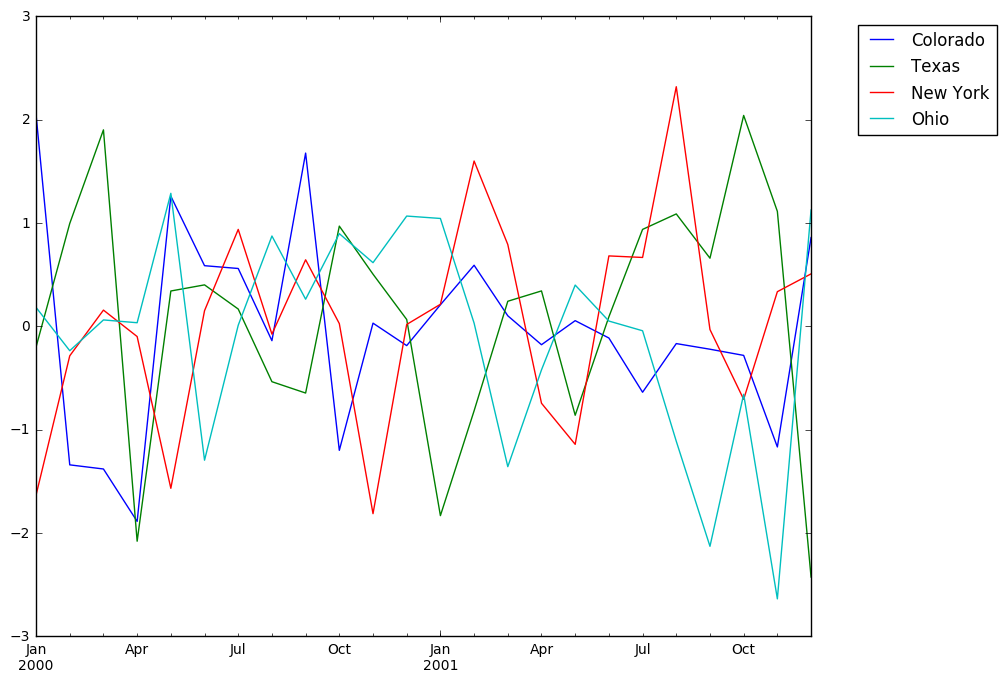

In [138]:
y=pd.rolling_sum(frame, 1).plot(figsize=(10,8))
y.legend(bbox_to_anchor=(1.05, 1), loc=2)